# What are the most demanded skills for the TOP 3 most popular data roles?

### Methodology
#### 
1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot the final findings


In [25]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_AUS = df[df['job_country'] == 'Australia'] # Filtering data for Australia

In [5]:
df_skills = df_AUS.explode('job_skills') # Exploding job skills
df_skills[['job_title', 'job_skills']] # Displaying rows

,job_title,job_skills
90,Data Scientist,python
90,Data Scientist,sql
90,Data Scientist,r
90,Data Scientist,java
90,Data Scientist,bash
...,...,...
785687,Senior Data Engineer,spark
785687,Senior Data Engineer,kafka
785687,Senior Data Engineer,airflow
785687,Senior Data Engineer,docker


In [10]:
df_skills_count =df_skills.groupby(['job_skills','job_title_short']).size() # Counting skills by job title
df_skills_count = df_skills_count.reset_index(name='skill_count') # Resetting index, so that it becomes a dataframe (from series  )
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True ) # Sorting skills by count , descending order
df_skills_count # Displaying skills

,job_skills,job_title_short,skill_count
1066,sql,Data Engineer,2914
835,python,Data Engineer,2388
84,azure,Data Engineer,1789
74,aws,Data Engineer,1752
1027,spark,Data Engineer,1157
...,...,...,...
308,firestore,Data Analyst,1
201,crystal,Senior Data Engineer,1
200,crystal,Data Scientist,1
300,fastapi,Cloud Engineer,1


In [11]:
job_titles = df_skills_count['job_title_short'].unique().tolist() # Getting unique job titles and converting to list
job_titles = sorted(job_titles[:5] )  # Selecting top 5 job titles for visualization
job_titles

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Senior Data Engineer',
 'Software Engineer']

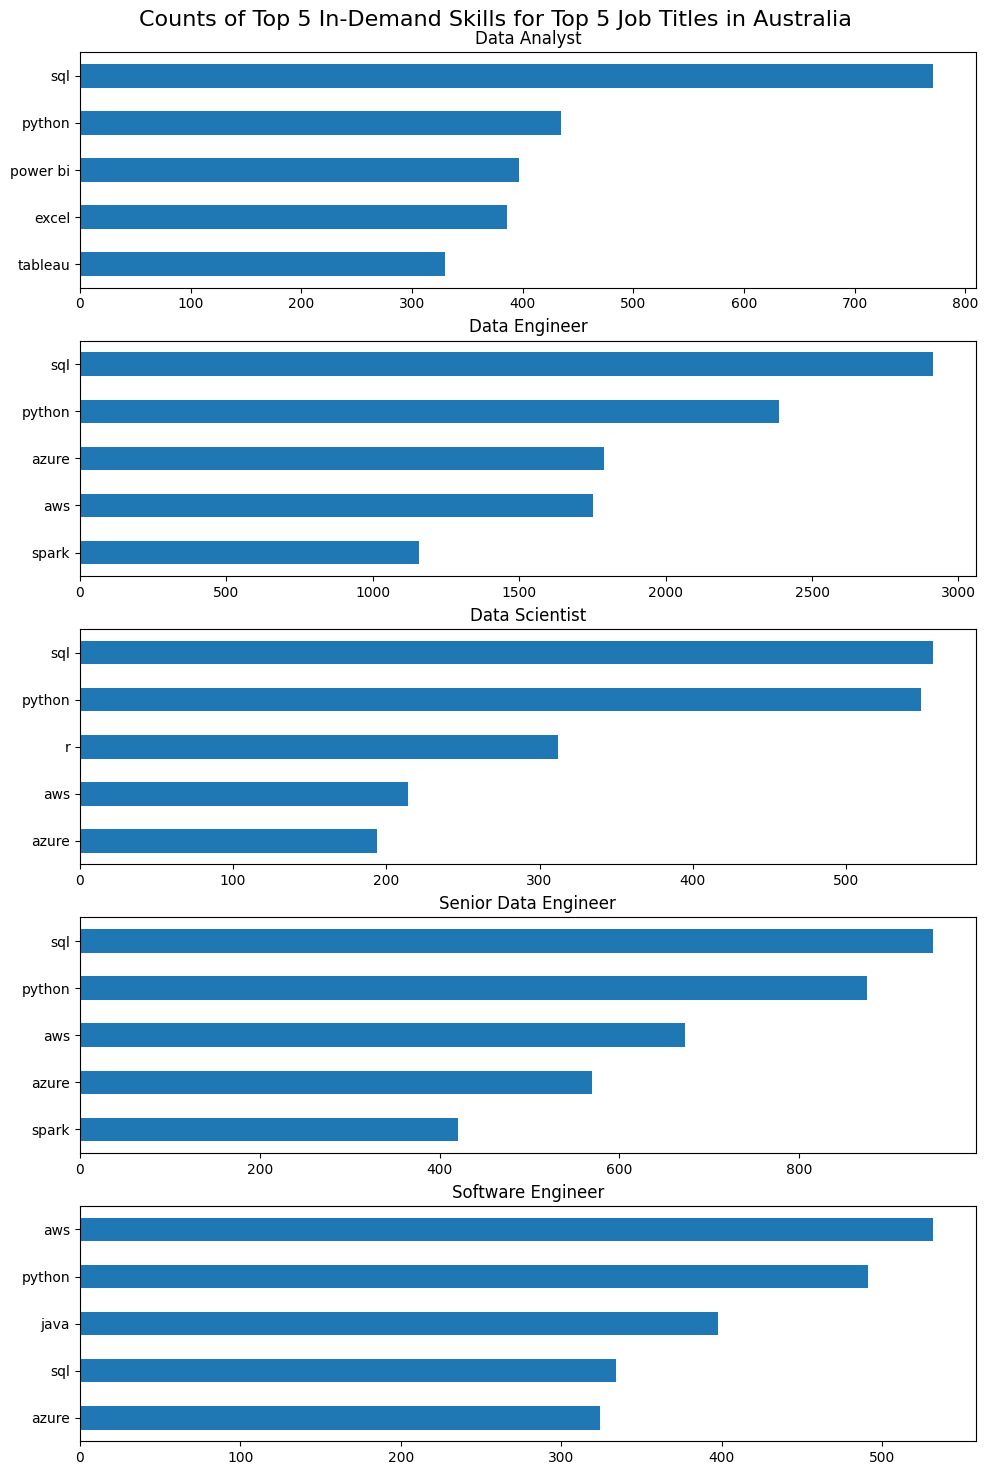

In [14]:
fig, ax =plt.subplots(len(job_titles),1, figsize=(10,15)) # Creating subplots for each job title        

for i, job_title in enumerate( job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head(5) # Getting top 5 skills for each job title
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job_title) # Plotting horizontal bar chart
    ax[i].invert_yaxis()  # Inverting y-axis to have the highest count on top
    ax[i].set_ylabel('') # Removing y-axis label
    ax[i].legend().set_visible(False) # Hiding legend

fig.suptitle('Counts of Top 5 In-Demand Skills for Top 5 Job Titles in Australia', fontsize=16) # Setting overall title
fig.tight_layout(h_pad=0.5) # Fix the overlapping issue
plt.show()    


In [16]:
df_job_title_count = df_AUS['job_title_short'].value_counts().reset_index(name='jobs_total') # Getting total job counts for each job title in Australia

In [21]:
df_skills_percent = pd.merge(df_skills_count,df_job_title_count,how='left',on='job_title_short') # Merging skill counts with total job counts
df_skills_percent['skill_percent'] = (df_skills_percent['skill_count']/df_skills_percent['jobs_total'])*100 # Calculating percentage of jobs requiring each skill
df_skills_percent

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,2914,4658,62.559038
1,python,Data Engineer,2388,4658,51.266638
2,azure,Data Engineer,1789,4658,38.407042
3,aws,Data Engineer,1752,4658,37.612709
4,spark,Data Engineer,1157,4658,24.838987
...,...,...,...,...,...
1302,firestore,Data Analyst,1,1658,0.060314
1303,crystal,Senior Data Engineer,1,1482,0.067476
1304,crystal,Data Scientist,1,1179,0.084818
1305,fastapi,Cloud Engineer,1,489,0.204499


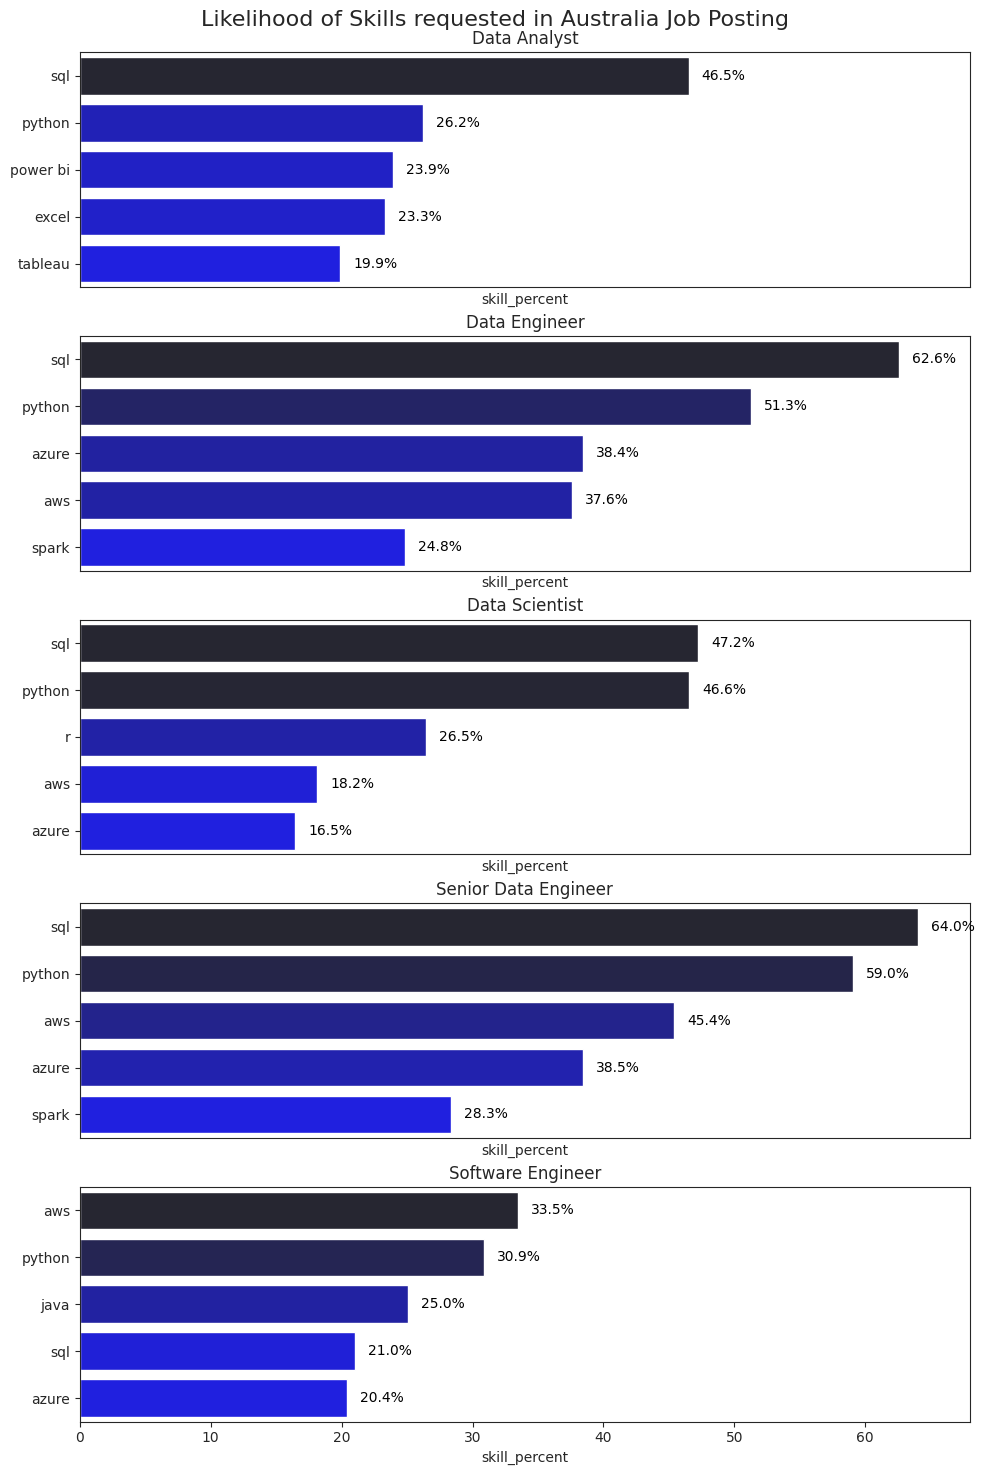

In [36]:
fig, ax =plt.subplots(len(job_titles),1, figsize=(10,15)) # Creating subplots for each job title        
sns.set_style('ticks')  # Setting seaborn style for better aesthetics

for i, job_title in enumerate( job_titles):
    df_plot = df_skills_percent[df_skills_percent['job_title_short']==job_title].head(5) # Getting top 5 skills for each job title
    #df_plot.plot(kind='barh',x='job_skills',y='skill_percent',ax=ax[i],title=job_title) # Plotting horizontal bar chart
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')  # Using seaborn for better aesthetics

    ax[i].set_title(job_title)  # Setting title for each subplot
    #ax[i].invert_yaxis()  # Inverting y-axis to have the highest count on top
    ax[i].set_ylabel('') # Removing y-axis label
    ax[i].legend().set_visible(False) # Hiding legend
    ax[i].set_xlim(0,68) # Setting x-axis limit for better visualization

    # Adding data labels to bars as Skill Percentage
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f"{v:.1f}%", color='black', va='center')  # Adding data labels to bars

    # Hiding x-axis ticks for all except the last subplot
    if i != len(job_titles) - 1:
        ax[i].set_xticks([]) # Hiding x-axis ticks

fig.suptitle('Likelihood of Skills requested in Australia Job Posting', fontsize=16) # Setting overall title
fig.tight_layout(h_pad=0.5) # Fix the overlapping issue
plt.show() 